Name : Hitesh Sanjaysing Girase

Branch/Year : BE AI&DS ( SEM - 7TH )

Roll No : 05

DMV Practical No & Title : 3. Analyzing Customer Churn in a Telecommunications Company

In [3]:
 # Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
data = pd.read_csv("C:/Users/Hitesh Girase/Downloads/Telcom_Customer_Churn.csv")


In [23]:
# Load and Inspect Data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
data.shape

(7043, 21)

In [31]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [38]:
# Data Cleaning and Preprocessing

In [40]:
# Check for missing values
print("Missing values in each column:\n")
print(data.isna().sum())


Missing values in each column:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [42]:
# Remove duplicates
print("\nRows before removing duplicates:", data.shape[0])
data.drop_duplicates(inplace=True)
print("Rows after removing duplicates:", data.shape[0])


Rows before removing duplicates: 7043
Rows after removing duplicates: 7043


In [46]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [48]:
# scaling for numerical columns
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [50]:
print("\nData types after preprocessing:\n")
print(data.dtypes)


Data types after preprocessing:

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure              float64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object


In [53]:
# Correlation and Distribution Visualization

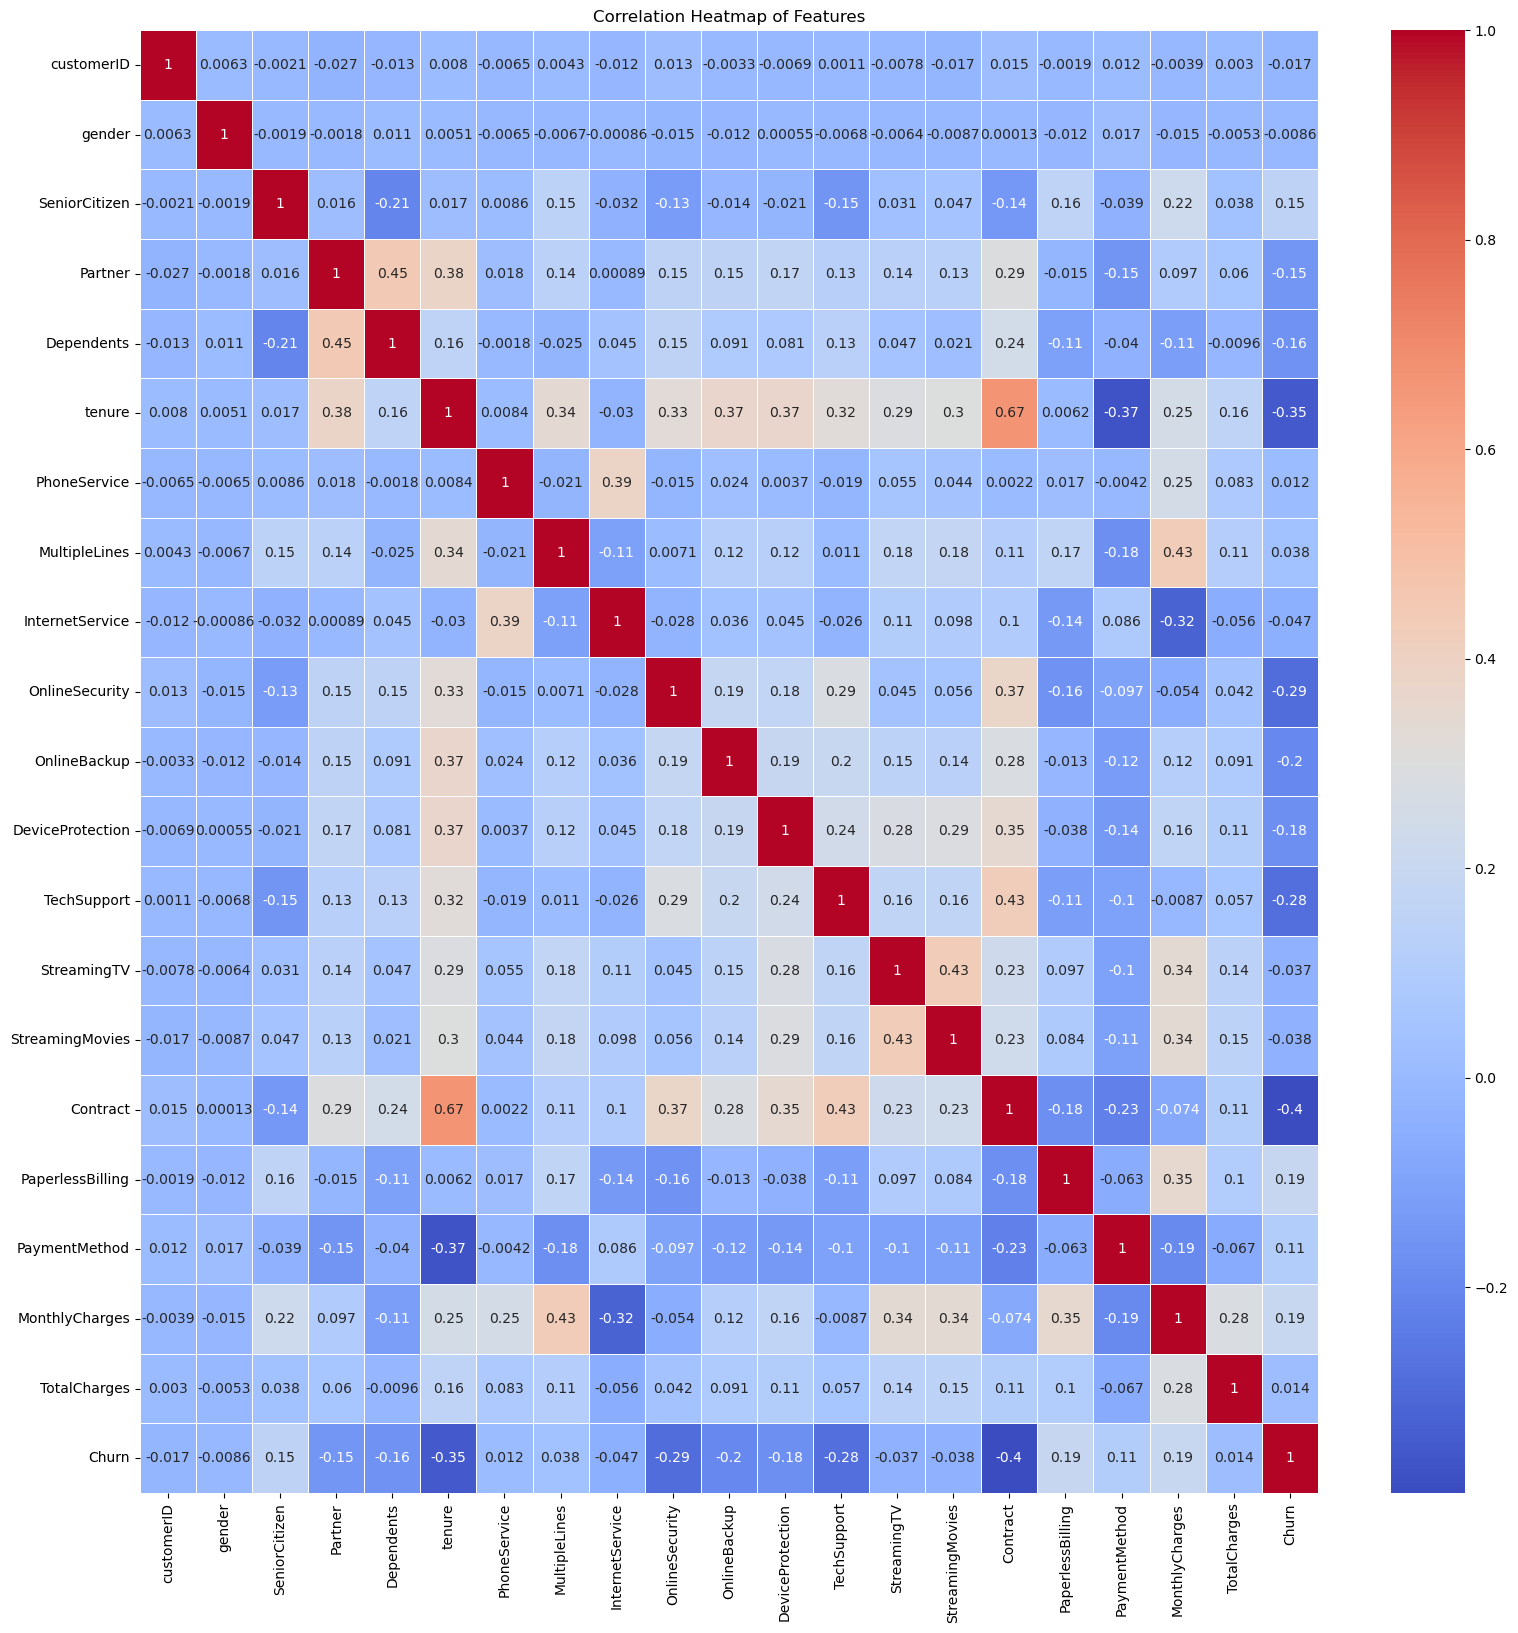

In [63]:
# Correlation heatmap
plt.figure(figsize=(19,19))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

C:\Users\Hitesh Girase\AppData\Local\Temp\ipykernel_15236\1167830294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set2')


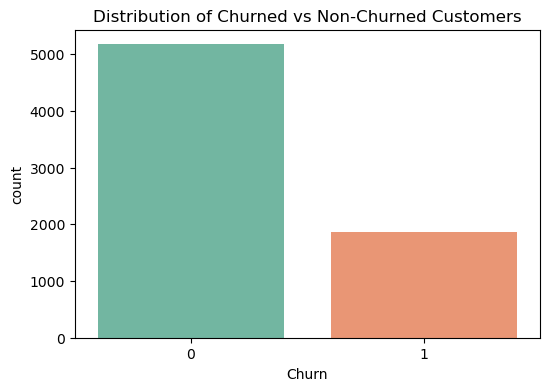

In [65]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title("Distribution of Churned vs Non-Churned Customers")
plt.show()

C:\Users\Hitesh Girase\AppData\Local\Temp\ipykernel_15236\1334509455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=data, palette='cool')


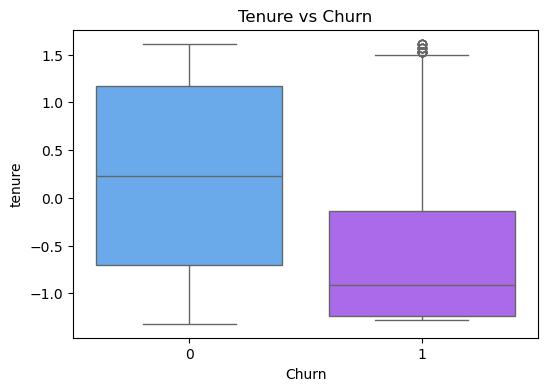

In [67]:
# Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=data, palette='cool')
plt.title("Tenure vs Churn")
plt.show()

In [69]:
# Model Training

In [71]:
# Define features and target
X = data.drop('Churn', axis=1)
y = data['Churn']


In [77]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [89]:
# Train and evaluate models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n {name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


 Logistic Regression Accuracy: 0.8148
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409


 Decision Tree Accuracy: 0.7189
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.48      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409


 Random Forest Accuracy: 0.7956
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    a

In [91]:
# Model Accuracy Comparison

C:\Users\Hitesh Girase\AppData\Local\Temp\ipykernel_15236\3114872356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='pastel')


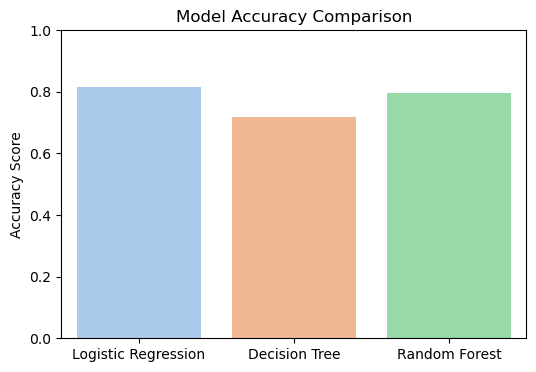

In [93]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='pastel')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.show()


In [95]:
# Feature Importance (Random Forest)

C:\Users\Hitesh Girase\AppData\Local\Temp\ipykernel_15236\674357914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.columns[:-1][indices], y=importances[indices], palette='mako')


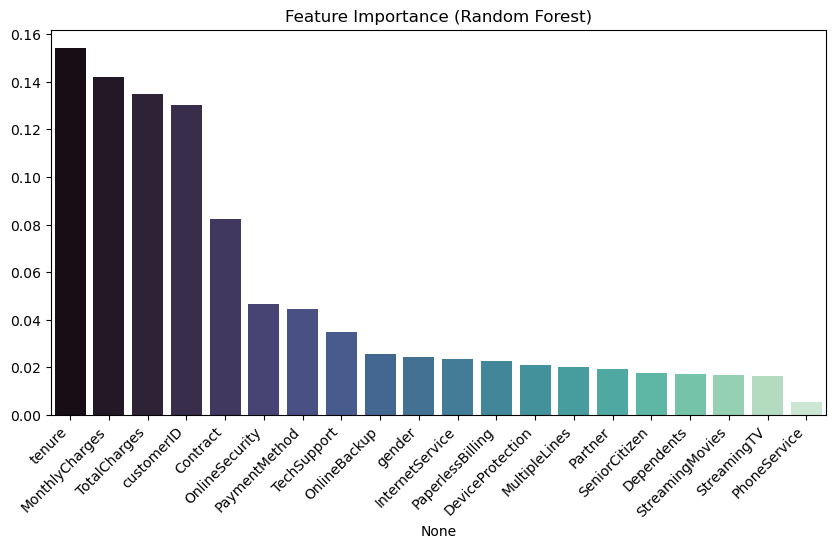

In [97]:
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(x=data.columns[:-1][indices], y=importances[indices], palette='mako')
plt.title("Feature Importance (Random Forest)")
plt.xticks(rotation=45, ha='right')
plt.show()


In [99]:
# Confusion Matrix

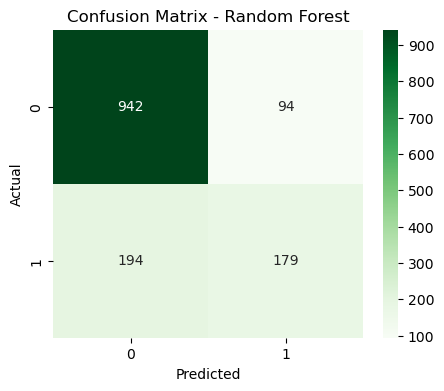

In [101]:
y_pred_rf = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Conclusion & key findings:

1) The telecom customer churn dataset was successfully cleaned and preprocessed.

2) Key factors like tenure, contract type, and monthly charges were found to influence customer churn.

3) Predictive models such as Logistic Regression, Decision Tree, and Random Forest were implemented and tested.

4) Random Forest model performed best in predicting customer churn accurately.

5) The analysis helps telecom companies identify at-risk customers and take steps to reduce churn.